In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/202112-baywheels-tripdata.csv")

In [ ]:
data.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8D08AA789BCE23E7,electric_bike,2021-12-08 06:44:08,2021-12-08 06:46:32,Scott St at Golden Gate Ave,SF-I19,Post St at Divisadero St,SF-G18,37.779198,-122.437070,37.784373,-122.439445,member
1,EA6516E2B9D63F99,classic_bike,2021-12-04 12:48:34,2021-12-04 13:08:05,Powell St BART Station (Market St at 4th St),SF-G27,Alamo Square (Steiner St at Fulton St),SF-J19,37.786138,-122.405234,37.777547,-122.433274,member
2,F4A642C21CFF210E,classic_bike,2021-12-23 12:28:08,2021-12-23 12:46:03,Cesar Chavez St at Dolores St,SF-S21,Arlington St at Roanoke St,SF-W19-2,37.747858,-122.424986,37.734966,-122.429772,member
3,A73A26A39F0A455A,electric_bike,2021-12-01 08:39:48,2021-12-01 08:52:57,Scott St at Golden Gate Ave,SF-I19,Powell St BART Station (Market St at 5th St),SF-H26,37.779073,-122.437077,37.784056,-122.408545,casual
4,656F0E72783C487B,classic_bike,2021-12-03 16:47:30,2021-12-03 16:52:22,Telegraph Ave at 49th St,OK-D4,52nd St at MLK Jr Way,OK-D3-2,37.835750,-122.262654,37.837369,-122.267656,member
5,B189F2825435807C,electric_bike,2021-12-03 05:47:44,2021-12-03 05:54:35,Scott St at Golden Gate Ave,SF-I19,Fell St at Stanyan St,SF-K15-,37.779098,-122.436993,37.771943,-122.453578,member
6,43529798FCE5A438,electric_bike,2021-12-09 17:23:13,2021-12-09 17:50:15,Scott St at Golden Gate Ave,SF-I19,Garfield Square (25th St at Harrison St),SF-R24,37.779121,-122.437075,37.750945,-122.412083,member
7,F339299D36141337,classic_bike,2021-12-29 18:07:26,2021-12-29 18:13:39,Jackson St at 5th St,SJ-J10,Saint James Park,SJ-L10,37.348759,-121.894798,37.339301,-121.889937,member
8,91F624E5EE9F4898,classic_bike,2021-12-10 15:35:01,2021-12-10 15:37:36,Scott St at Golden Gate Ave,SF-I19,Turk St at Fillmore St,SF-I20,37.778999,-122.436861,37.780450,-122.431946,casual
9,DD04DB023B8B9AE0,electric_bike,2021-12-08 08:38:17,2021-12-08 08:55:44,Scott St at Golden Gate Ave,SF-I19,Clay St at Battery St,SF-E28,37.779193,-122.436981,37.795084,-122.399501,member


In [ ]:
data.shape

(135838, 13)

In [ ]:
data.tail(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
135833,441430B51720ECD0,electric_bike,2021-12-02 20:43:28,2021-12-02 20:52:28,Church St at Duboce Ave,SF-L20,NaN,NaN,37.769872,-122.429150,37.770000,-122.450000,casual
135834,4E6EEDED1E3783E9,electric_bike,2021-12-10 15:40:39,2021-12-10 15:50:57,St. Joseph's Ave at Geary Blvd,SF-H17,NaN,NaN,37.782435,-122.441992,37.810000,-122.450000,casual
135835,DE1C9E261375F593,classic_bike,2021-12-01 11:04:31,2021-12-01 11:18:39,Church St at Duboce Ave,SF-L20,NaN,NaN,37.769818,-122.429149,37.780000,-122.440000,casual
135836,927954A40EE38BA1,electric_bike,2021-12-04 12:24:28,2021-12-04 13:03:58,Church St at Duboce Ave,SF-L20,NaN,NaN,37.769737,-122.429295,37.760000,-122.500000,casual
135837,B25F58DE9C2BE99C,electric_bike,2021-12-24 00:27:08,2021-12-24 00:30:01,Garfield Square (25th St at Harrison St),SF-R24,Garfield Square (25th St at Harrison St),SF-R24,37.750962,-122.412028,37.750945,-122.412083,member


In [ ]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8D08AA789BCE23E7,electric_bike,2021-12-08 06:44:08,2021-12-08 06:46:32,Scott St at Golden Gate Ave,SF-I19,Post St at Divisadero St,SF-G18,37.779198,-122.437070,37.784373,-122.439445,member
1,EA6516E2B9D63F99,classic_bike,2021-12-04 12:48:34,2021-12-04 13:08:05,Powell St BART Station (Market St at 4th St),SF-G27,Alamo Square (Steiner St at Fulton St),SF-J19,37.786138,-122.405234,37.777547,-122.433274,member
2,F4A642C21CFF210E,classic_bike,2021-12-23 12:28:08,2021-12-23 12:46:03,Cesar Chavez St at Dolores St,SF-S21,Arlington St at Roanoke St,SF-W19-2,37.747858,-122.424986,37.734966,-122.429772,member
3,A73A26A39F0A455A,electric_bike,2021-12-01 08:39:48,2021-12-01 08:52:57,Scott St at Golden Gate Ave,SF-I19,Powell St BART Station (Market St at 5th St),SF-H26,37.779073,-122.437077,37.784056,-122.408545,casual
4,656F0E72783C487B,classic_bike,2021-12-03 16:47:30,2021-12-03 16:52:22,Telegraph Ave at 49th St,OK-D4,52nd St at MLK Jr Way,OK-D3-2,37.835750,-122.262654,37.837369,-122.267656,member
5,B189F2825435807C,electric_bike,2021-12-03 05:47:44,2021-12-03 05:54:35,Scott St at Golden Gate Ave,SF-I19,Fell St at Stanyan St,SF-K15-,37.779098,-122.436993,37.771943,-122.453578,member
6,43529798FCE5A438,electric_bike,2021-12-09 17:23:13,2021-12-09 17:50:15,Scott St at Golden Gate Ave,SF-I19,Garfield Square (25th St at Harrison St),SF-R24,37.779121,-122.437075,37.750945,-122.412083,member
7,F339299D36141337,classic_bike,2021-12-29 18:07:26,2021-12-29 18:13:39,Jackson St at 5th St,SJ-J10,Saint James Park,SJ-L10,37.348759,-121.894798,37.339301,-121.889937,member
8,91F624E5EE9F4898,classic_bike,2021-12-10 15:35:01,2021-12-10 15:37:36,Scott St at Golden Gate Ave,SF-I19,Turk St at Fillmore St,SF-I20,37.778999,-122.436861,37.780450,-122.431946,casual
9,DD04DB023B8B9AE0,electric_bike,2021-12-08 08:38:17,2021-12-08 08:55:44,Scott St at Golden Gate Ave,SF-I19,Clay St at Battery St,SF-E28,37.779193,-122.436981,37.795084,-122.399501,member


In [ ]:
print(data.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


In [12]:
data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    26359
start_station_id      26359
end_station_name      29464
end_station_id        29464
start_lat                 0
start_lng                 0
end_lat                 150
end_lng                 150
member_casual             0
dtype: int64

In [38]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
135833    False
135834    False
135835    False
135836    False
135837    False
Length: 135838, dtype: bool

In [14]:
sum(data.duplicated())

0

In [16]:
data.nunique

<bound method DataFrame.nunique of                  ride_id  rideable_type           started_at  \
0       8D08AA789BCE23E7  electric_bike  2021-12-08 06:44:08   
1       EA6516E2B9D63F99   classic_bike  2021-12-04 12:48:34   
2       F4A642C21CFF210E   classic_bike  2021-12-23 12:28:08   
3       A73A26A39F0A455A  electric_bike  2021-12-01 08:39:48   
4       656F0E72783C487B   classic_bike  2021-12-03 16:47:30   
...                  ...            ...                  ...   
135833  441430B51720ECD0  electric_bike  2021-12-02 20:43:28   
135834  4E6EEDED1E3783E9  electric_bike  2021-12-10 15:40:39   
135835  DE1C9E261375F593   classic_bike  2021-12-01 11:04:31   
135836  927954A40EE38BA1  electric_bike  2021-12-04 12:24:28   
135837  B25F58DE9C2BE99C  electric_bike  2021-12-24 00:27:08   

                   ended_at                            start_station_name  \
0       2021-12-08 06:46:32                   Scott St at Golden Gate Ave   
1       2021-12-04 13:08:05  Powell St BAR

In [20]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [23]:
data.drop(['ride_id','start_station_id','end_station_id'],axis=1,inplace=True)

In [25]:

data.head(3)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2021-12-08 06:44:08,2021-12-08 06:46:32,Scott St at Golden Gate Ave,Post St at Divisadero St,37.779198,-122.437070,37.784373,-122.439445,member
1,classic_bike,2021-12-04 12:48:34,2021-12-04 13:08:05,Powell St BART Station (Market St at 4th St),Alamo Square (Steiner St at Fulton St),37.786138,-122.405234,37.777547,-122.433274,member
2,classic_bike,2021-12-23 12:28:08,2021-12-23 12:46:03,Cesar Chavez St at Dolores St,Arlington St at Roanoke St,37.747858,-122.424986,37.734966,-122.429772,member


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:3

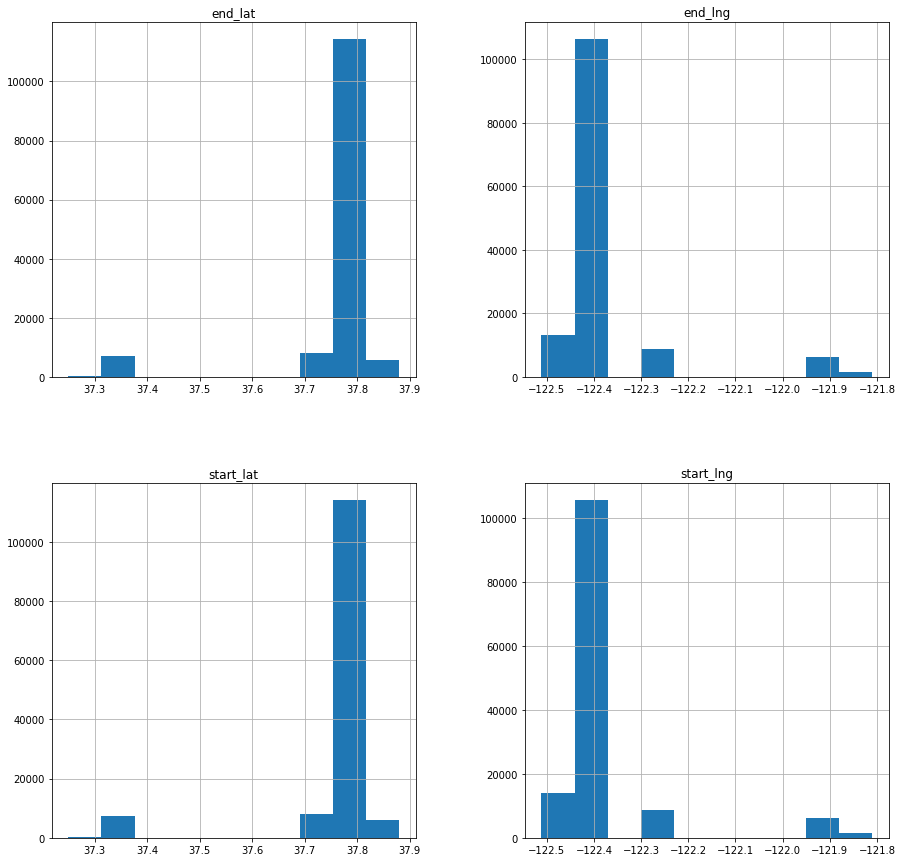

In [42]:
data.hist(figsize=(15,15));

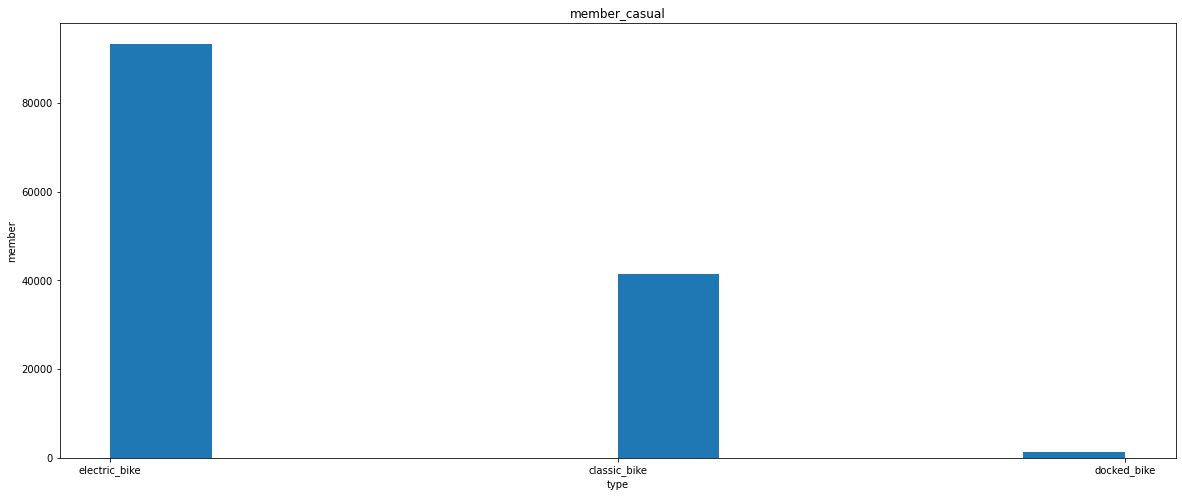

In [45]:
plt.figure(figsize=(20,8))
plt.hist(data['rideable_type'])
plt.title('member_casual')
plt.xlabel('type')
plt.ylabel('member');

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255

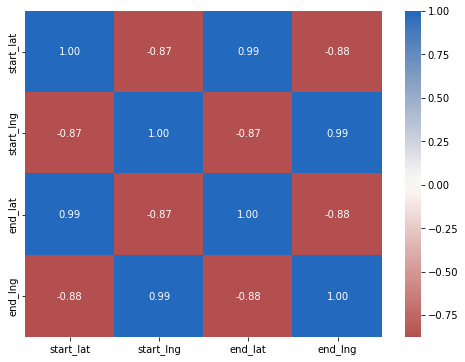

In [30]:
#BIVARIATE EXPLORATION
all_numeric_vars = [ 'rideable_type', 'started_at', 'ended_at',
       'start_station_name','end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual']
key_numeric_vars = ['rideable_type','member_casual']
# correlation plot
plt.figure(figsize=[8,6])
sns.heatmap(data[all_numeric_vars].corr(), annot=True, fmt='.2f',cmap='vlag_r', center=0 )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 576x576 with 0 Axes>

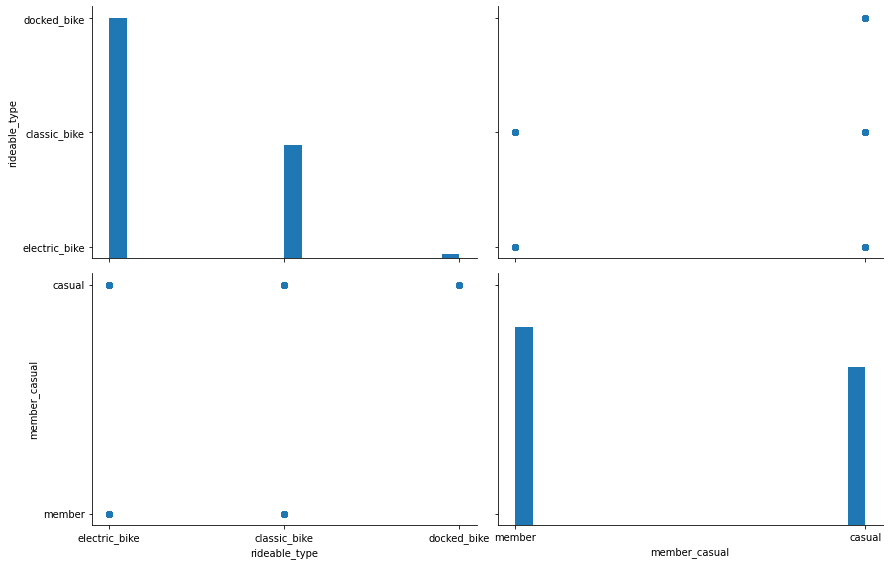

In [32]:
# plot matrix: sample 500 records so that plots are clearer and they render faster
data_sample = data.sample(500, replace=False)
plt.figure(figsize=[8,8])
g = sns.PairGrid(data=data_sample, vars = key_numeric_vars, size=4, aspect=1.5)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist, bins=20)
plt.show()

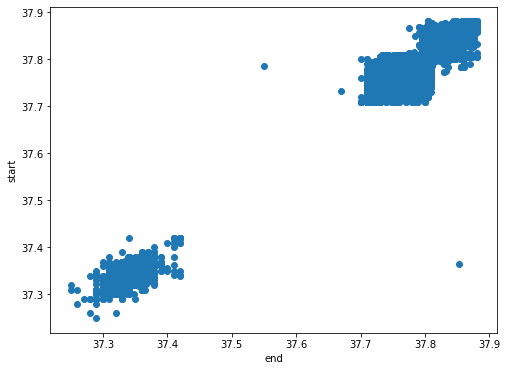

In [50]:
plt.figure(figsize=[8,6])
plt.scatter(data=data, x='end_lat', y= 'start_lat')
plt.ylabel('start')
plt.xlabel('end')
plt.show()

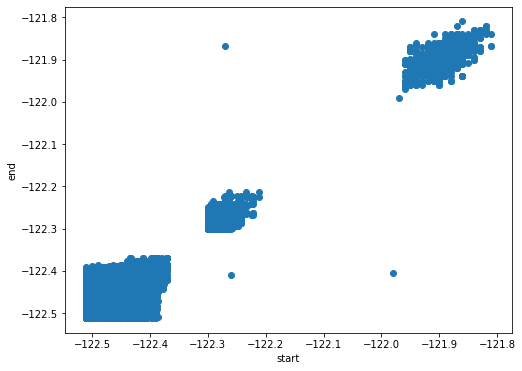

In [51]:
plt.figure(figsize=[8,6])
plt.scatter(data=data, x='end_lng', y= 'start_lng')
plt.ylabel('end')
plt.xlabel('start')
plt.show()